In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
orig_test=pd.read_csv("test.csv")
orig_train = pd.read_csv("train.csv")
# Preview the first 5 lines of the loaded data 

In [0]:
orig_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
orig_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
def prepare_data(orig_train):
    train=orig_train.drop(['Name'], axis=1)
    train=train.drop(['Ticket'], axis=1)
    train=train.drop(['Cabin'], axis=1)
    train=train.drop(['PassengerId'], axis=1)
    train['Sex'] = train['Sex'].astype('category')
    sex_col = train.select_dtypes(['category']).columns
    train[sex_col] = train[sex_col].apply(lambda x: x.cat.codes)
    train['Embarked'] = train['Embarked'].astype('category')
    Embarked_col = train.select_dtypes(['category']).columns
    train[Embarked_col] = train[Embarked_col].apply(lambda x: x.cat.codes)
    return train
    

In [0]:
train=prepare_data(orig_train)
test=prepare_data(orig_test)

In [0]:
def handle_nans(dataset):
    print("------------------------------------------------------------------------")
    percent_missing = dataset.isnull().sum() * 100 / len(dataset)
    missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                     'percent_missing': percent_missing})
    print("Missing Values:")
    print(missing_value_df)
    dataset=dataset.mask(dataset.isnull(), np.random.uniform(dataset["Age"].min(),
                                             dataset["Age"].max(),
                                             size=dataset.shape))
    dataset=dataset.fillna(method='ffill')
    print("Data description")
    print(dataset.describe())
    percent_missing = dataset.isnull().sum() * 100 / len(dataset)
    missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                     'percent_missing': percent_missing})
    print("New Missing Values:")
    print(missing_value_df)
    print("------------------------------------------------------------------------")
    return dataset

In [0]:
train_nan=handle_nans(train)
test_nan=handle_nans(test)

------------------------------------------------------------------------
Missing Values:
         column_name  percent_missing
Survived    Survived          0.00000
Pclass        Pclass          0.00000
Sex              Sex          0.00000
Age              Age         19.86532
SibSp          SibSp          0.00000
Parch          Parch          0.00000
Fare            Fare          0.00000
Embarked    Embarked          0.00000
Data description
         Survived      Pclass         Sex  ...       Parch        Fare    Embarked
count  891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.647587  ...    0.381594   32.204208    1.529742
std      0.486592    0.836071    0.477990  ...    0.806057   49.693429    0.800254
min      0.000000    1.000000    0.000000  ...    0.000000    0.000000   -1.000000
25%      0.000000    2.000000    0.000000  ...    0.000000    7.910400    1.000000
50%      0.000000    3.000000    1.000000  ...    0.00

# Correlation analysis:

a)Not high correlation found between any features, so we will not remove any of them. High correlation between two features implies we can use one of them instead of both.

b)Low correlation with the target variable might seems that we can remove the feature,though we must consider the fact that we might use a classifier that will be able to exploit non linear dependencies between the target-feature.

c)Correlation does not change if we standarize.



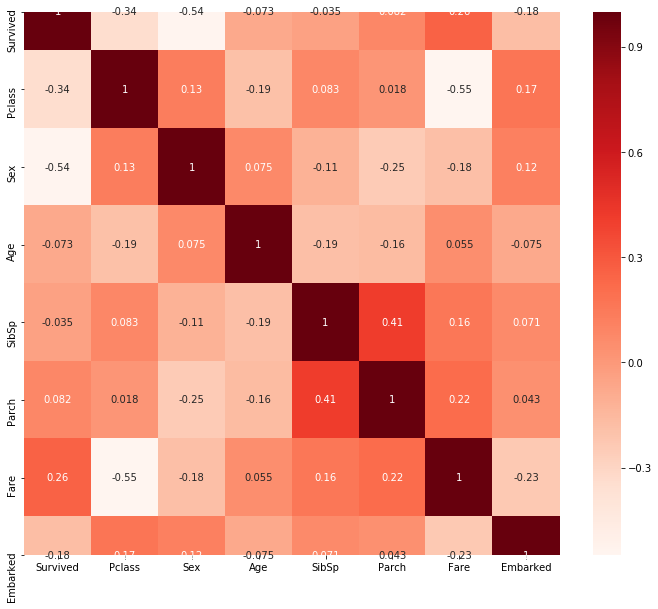

In [0]:
plt.figure(figsize=(12,10))
cor = train_nan.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

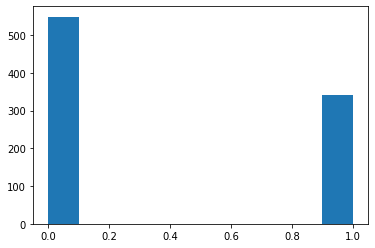

In [0]:
train_X=train_nan.drop(["Survived"],axis=1)
train_Y=train_nan["Survived"]
plt.hist(train_Y)
#boxplot = train_X.boxplot()

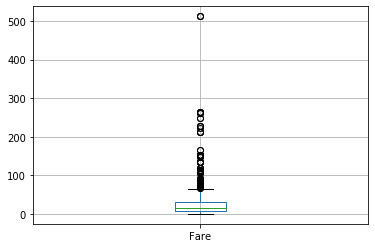

In [0]:
boxplot = train_X.boxplot(column='Fare')


In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"))
embeded_lr_selector.fit(train_X, train_Y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_X.loc[:,embeded_lr_support].columns.tolist()
print(str(embeded_lr_feature), 'selected features')


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] selected features


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
train_X_=train_X.drop(['Embarked'],axis=1)
test_X_=test_nan.drop(['Embarked'],axis=1)
train_X_=train_X_.drop(['Fare'],axis=1)
test_X_=test_X_.drop(['Fare'],axis=1)
train_X_=train_X_.drop(['Parch'],axis=1)
test_X_=test_X_.drop(['Parch'],axis=1)
train_X_=train_X_.drop(['SibSp'],axis=1)
test_X_=test_X_.drop(['SibSp'],axis=1)

In [0]:
from sklearn import preprocessing
def scale(inp):
    scaler = preprocessing.StandardScaler()
    # Fit your data on the scaler object
    out = scaler.fit_transform(inp)
    out = pd.DataFrame(out, columns=inp.columns)
    return out
scaled_df_train=scale(train_X_)
scaled_df_test=scale(test_X_)

In [0]:
print(scaled_df_train.describe())

             Pclass           Sex           Age
count  8.910000e+02  8.910000e+02  8.910000e+02
mean  -2.031048e-16 -4.059603e-16 -4.287502e-17
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -1.566107e+00 -1.355574e+00 -1.841982e+00
25%   -3.693648e-01 -1.355574e+00 -6.578764e-01
50%    8.273772e-01  7.376951e-01 -1.191170e-01
75%    8.273772e-01  7.376951e-01  5.798140e-01
max    8.273772e-01  7.376951e-01  2.793096e+00


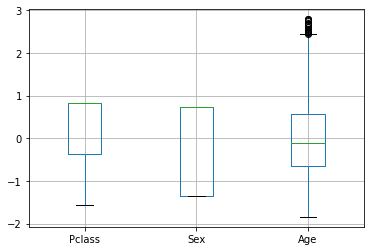

In [0]:
boxplot = scaled_df_train.boxplot()

In [0]:
def write_to_file(y_pred,filename):
    f = open(filename, "w")
    f.write("PassengerId,Survived\n")
    for i in range(418):
        f.write(str(892+i)+","+str(y_pred[i])+"\n")
    f.close()

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=10)
algo={
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(kernel='rbf'),
    "RandomForestClassifier":RandomForestClassifier(n_jobs=2, random_state=0,max_depth=5)
}
best=1
res={}
for key in algo.keys():
    res[key]=0
cnt=0
for train_index, test_index in skf.split(scaled_df_train,train_Y ):
    print("----------------------------------------")
    cnt+=1
    for algor in algo.keys():
        algo[algor].fit(scaled_df_train.iloc[train_index], train_Y.iloc[train_index])
        y_pred = algo[algor].predict(scaled_df_train.iloc[test_index])
        f1='{0:.2f}'.format(f1_score(train_Y.iloc[test_index], y_pred, average='weighted'))
        print(algor,str(f1))
        res[algor]=float(f1)+res[algor]
    print("----------------------------------------")
for algor in algo.keys():
  res[algor]=res[algor]/cnt

----------------------------------------
LogisticRegression 0.78
SVC 0.73


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.78
----------------------------------------
----------------------------------------
LogisticRegression 0.74
SVC 0.77


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.79
----------------------------------------
----------------------------------------
LogisticRegression 0.78
SVC 0.71


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.75
----------------------------------------
----------------------------------------
LogisticRegression 0.85
SVC 0.88


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.86
----------------------------------------
----------------------------------------
LogisticRegression 0.80
SVC 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.79
----------------------------------------
----------------------------------------
LogisticRegression 0.78
SVC 0.78


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.79
----------------------------------------
----------------------------------------
LogisticRegression 0.76
SVC 0.77


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.80
----------------------------------------
----------------------------------------
LogisticRegression 0.70
SVC 0.72


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.69
----------------------------------------
----------------------------------------
LogisticRegression 0.78
SVC 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.84
----------------------------------------
----------------------------------------
LogisticRegression 0.77
SVC 0.79


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.78
----------------------------------------


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(scaled_df_train, train_Y)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
y_pred=rf_random.predict(scaled_df_test)
write_to_file(y_pred,"svc.txt")

In [0]:
import operator
print(res)
print(max(res.items(), key=operator.itemgetter(1))[0])

{'LogisticRegression': 0.774, 'SVC': 0.7789999999999999, 'RandomForestClassifier': 0.787}
RandomForestClassifier


In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,100,1000],'gamma':[10,1,0.1,0.01,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(scaled_df_train,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ..................... C=1, gamma=10, kernel=linear, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 10.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid.best_params_

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [0]:

y_pred = grid.predict(scaled_df_test)
write_to_file(y_pred,"svc.txt")

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.config.set_soft_device_placement(True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
%tensorflow_version 1.x magic

Num GPUs Available:  1
`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x magic`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from math import floor, ceil
scaled_df_train=scale(train_X)
scaled_df_test=scale(test_nan)
n_y_train=pd.get_dummies(train_Y.astype(str))
train_cnt = floor(scaled_df_train.shape[0] * 0.9)
x_train = scaled_df_train.iloc[0:train_cnt].values
y_train = n_y_train.iloc[0:train_cnt].values
x_test = scaled_df_train.iloc[train_cnt:].values
y_test = n_y_train.iloc[train_cnt:].values

In [0]:
def multilayer_perceptron(x, weights,biases, keep_prob):
  layer_1 = tf.add(tf.matmul(x, weights), biases)
  layer_1 = tf.nn.relu(layer_1)
  layer_1 = tf.nn.dropout(layer_1, keep_prob)
  return layer_1

In [0]:
n_hidden_1 = 27
n_hidden_2 = 9
n_hidden_3 = 4
n_input = x_train.shape[1]
n_classes = y_train.shape[1]
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    #'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    #'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [0]:
training_epochs = 5000
display_step = 100
batch_size = 32

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None,n_classes])

In [0]:

layer_1 = multilayer_perceptron(x, weights['h1'],biases['b1'], 0.5)
layer_2 = multilayer_perceptron(layer_1, weights['h2'],biases['b2'], keep_prob)
#layer_3 = multilayer_perceptron(layer_2, weights['h3'],biases['b3'], keep_prob)
#layer_4 = multilayer_perceptron(layer_3, weights['h4'],biases['b4'], keep_prob)
predictions = tf.matmul(layer_2,weights['out']) + biases['out']
predictions=tf.nn.sigmoid(predictions)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
accuracy=""
with tf.device('/device:GPU:0'):
  with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      
      for epoch in range(training_epochs):
          avg_cost = 0.0
          total_batch = int(len(x_train) / batch_size)
          x_batches = np.array_split(x_train, total_batch)
          y_batches = np.array_split(y_train, total_batch)
          for i in range(total_batch):
            _, c = sess.run([optimizer, cost],
                            feed_dict={
                                x: x_batches[i],
                                y: y_batches[i],
                                keep_prob: 0.8
                              })
            avg_cost += c / total_batch
          if epoch % display_step == 0:
              print("Epoch:", '%04d' % (epoch+1), "cost=", \
                  "{:.9f}".format(avg_cost))
      print("Optimization Finished!")
      correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      print("Accuracy:", accuracy.eval({x: x_test, y: y_test, keep_prob: 1.0}))
      
      outcome=sess.run([predictions], feed_dict={x:scaled_df_test.values,keep_prob:0.8})
      y_pred=tf.argmax(outcome[0],1)
      print("----------------------------------------------")
      write_to_file(y_pred.eval(),"nn.txt")

Epoch: 0001 cost= 0.907587280
Epoch: 0101 cost= 0.551238810
Epoch: 0201 cost= 0.532068563
Epoch: 0301 cost= 0.516883131
Epoch: 0401 cost= 0.516419818
Epoch: 0501 cost= 0.507463726
Epoch: 0601 cost= 0.498539027
Epoch: 0701 cost= 0.495926169
Epoch: 0801 cost= 0.496229959
Epoch: 0901 cost= 0.490294607
Epoch: 1001 cost= 0.485962467
Epoch: 1101 cost= 0.485225966
Epoch: 1201 cost= 0.494072587
Epoch: 1301 cost= 0.480874159
Epoch: 1401 cost= 0.486086843
Epoch: 1501 cost= 0.481234590
Epoch: 1601 cost= 0.477293851
Epoch: 1701 cost= 0.479976040
Epoch: 1801 cost= 0.478290952
Epoch: 1901 cost= 0.474497732
Epoch: 2001 cost= 0.474776554
Epoch: 2101 cost= 0.481683841
Epoch: 2201 cost= 0.472004573
Epoch: 2301 cost= 0.472555127
Epoch: 2401 cost= 0.476821779
Epoch: 2501 cost= 0.472921642
Epoch: 2601 cost= 0.476328961
Epoch: 2701 cost= 0.474170628
Epoch: 2801 cost= 0.472433274
Epoch: 2901 cost= 0.473067991
Epoch: 3001 cost= 0.473289745
Epoch: 3101 cost= 0.469806037
Epoch: 3201 cost= 0.470354620
Epoch: 330

In [0]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    print("------------------"+
          clf.__class__.__name__+"-----------------------------")
    vanilla_scores = cross_val_score(clf, scaled_df_train, train_Y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=3, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, scaled_df_train, train_Y, cv=10,n_jobs=-1)
    print("Mean of: {0:.3f}, std: (+/-) {1:.3f}".format(
        vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {0:.3f}, std: (+/-) {1:.3f} [Bagging]\n".format(
        bagging_scores.mean(), bagging_scores.std()))
    print("-----------------------------------------------")

In [0]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, scaled_df_train, train_Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [0]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
#!pip install mlens
from mlens.ensemble import SuperLearner
lr = LogisticRegression()
names = ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier']
def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([list(combinations(arg, i)) for i in range(len(arg) + 1)]
                             , [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])
stacked_clf_list = zip_stacked_classifiers(clf_array, names)
best_combination = [0.00, ""]
for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy, 
                            random_state = seed, 
                            folds = 10)
    print(2,"clif",clf[0])
    ensemble.add(clf[0])
    print(3)
    ensemble.add_meta(lr)
    print(1)
    ensemble.fit(scaled_df_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}").format(accuracy, clf[1])
print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])